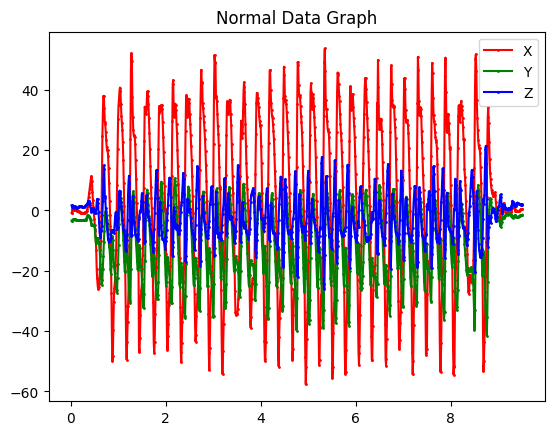

       Time         X         Y         Z
0  0.036636  1.069785 -1.836714  1.496201
1  0.046636  1.067242 -1.850755  1.514780
2  0.056636  1.064895 -1.864507  1.533033


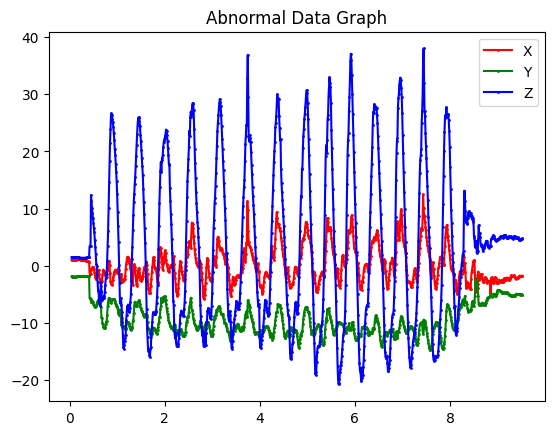

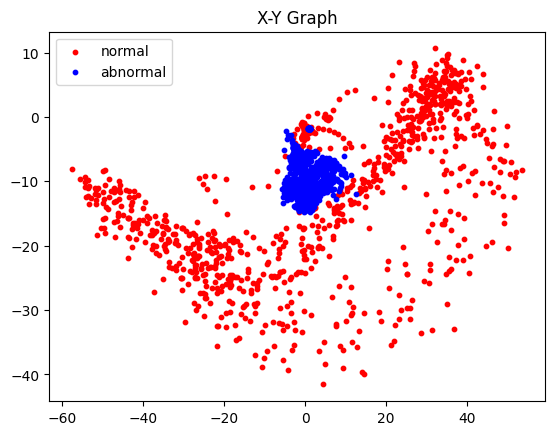

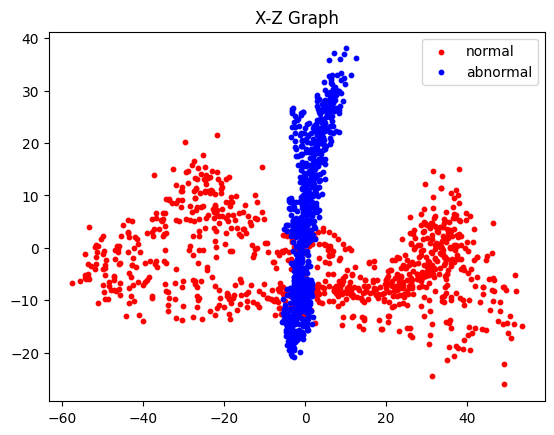

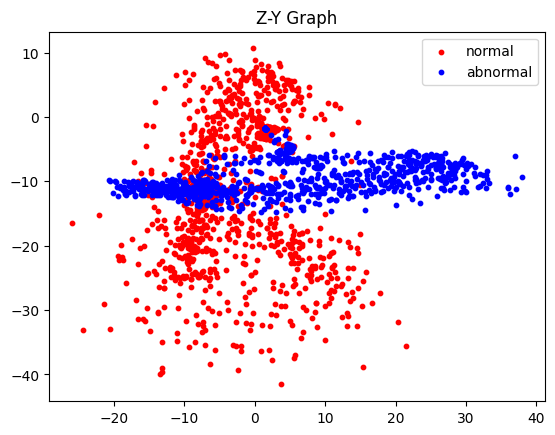

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [1]:
# 센서 데이터 분석하기
import pandas as pd
# Data1
# 데이터 읽어와서 컬럼 이름 확인하기
df = pd.read_csv('RawData1.csv', header=0)
# 컬럼명 변경하기
df = df.rename(columns={'Time (s)': 'Time', 'Linear Acceleration x (m/s^2)': 'X', 'Linear Acceleration y (m/s^2)': 'Y', 'Linear Acceleration z (m/s^2)': 'Z', 'Absolute acceleration (m/s^2)': 'W'})
# 데이터 크기 조절(950개)
df = df[:950]
# 데이터 확인
# 필요 데이터 추출
df = df[['Time','X', 'Y', 'Z']]
# 데이터 시각화
import matplotlib.pyplot as plt
plt.plot(df['Time'], df['X'],label='X', c='r', linestyle='solid', marker='.', markersize=2)
plt.plot(df['Time'], df['Y'],label='Y', c='g', linestyle='solid', marker='.', markersize=2)
plt.plot(df['Time'], df['Z'],label='Z', c='b', linestyle='solid', marker='.', markersize=2)
plt.title('Normal Data Graph')
plt.legend(loc='best', fontsize=10)
plt.show()
plt.figure()
# Data2
df2 = pd.read_csv('RawData2.csv', header=0)
# 컬럼명 변경하기
df2 = df2.rename(columns={'Time (s)': 'Time', 'Linear Acceleration x (m/s^2)': 'X', 'Linear Acceleration y (m/s^2)': 'Y', 'Linear Acceleration z (m/s^2)': 'Z', 'Absolute acceleration (m/s^2)': 'W'})
# 데이터 크기 조절(950개)
df2 = df2[:950]
# 데이터 확인
# 필요 데이터 추출
df2 = df2[['Time','X', 'Y', 'Z']]
print(df2.head(3))
# 데이터 시각화
import matplotlib.pyplot as plt
plt.plot(df2['Time'], df2['X'],label='X', c='r', linestyle='solid', marker='.', markersize=2)
plt.plot(df2['Time'], df2['Y'],label='Y', c='g', linestyle='solid', marker='.', markersize=2)
plt.plot(df2['Time'], df2['Z'],label='Z', c='b', linestyle='solid', marker='.', markersize=2)
plt.title('Abnormal Data Graph')
plt.legend(loc='best', fontsize=10)
plt.show()
plt.figure()
# 시각화 1
import matplotlib.pyplot as plt
plt.scatter(df['X'], df['Y'],label='normal',c='r',marker='o',s=10)
plt.scatter(df2['X'], df2['Y'],label='abnormal',c='b',marker='o',s=10)
plt.title('X-Y Graph')
plt.legend(loc='best', fontsize=10)
plt.show()
plt.figure()
# 시각화 2
import matplotlib.pyplot as plt
plt.scatter(df['X'], df['Z'],label='normal',c='r',marker='o',s=10)
plt.scatter(df2['X'], df2['Z'],label='abnormal',c='b',marker='o',s=10)
plt.title('X-Z Graph')
plt.legend(loc='best', fontsize=10 )
plt.show()
plt.figure()
# 시각화 3
import matplotlib.pyplot as plt
plt.scatter(df['Z'], df['Y'],label='normal',c='r',marker='o',s=10)
plt.scatter(df2['Z'], df2['Y'],label='abnormal',c='b',marker='o',s=10)
plt.title('Z-Y Graph')
plt.legend(loc='best', fontsize=10)
plt.show()
plt.figure()

In [2]:
# 레이블 추가
df['label'] = 0  # 정상 데이터 레이블
df2['label'] = 1  # 비정상 데이터 레이블

In [3]:
# 데이터 결합
data = pd.concat([df, df2], ignore_index=True)

In [4]:
# 특징과 레이블 분리
X = data.drop(columns=['label'])  # 레이블 제외
y = data['label']  # 레이블
print(X.shape, y.shape)

(1900, 4) (1900,)


In [5]:
# 데이터 스케일링 (선택 사항)
# KNN은 거리 기반 모델이므로, 데이터를 정규화하거나 표준화하는 것이 중요합니다.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# 데이터를 학습용(train)과 테스트용(test)으로 분할합니다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1520, 4) (380, 4) (1520,) (380,)


In [7]:
# KNN 모델 생성 및 학습
from sklearn.neighbors import KNeighborsClassifier

# 모델 생성
knn = KNeighborsClassifier(n_neighbors=1)  # k값은 필요에 따라 조정
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [8]:
# 모델 평가
from sklearn.metrics import accuracy_score, classification_report

# 예측
y_pred = knn.predict(X_test)

# 정확도 출력
print("Accuracy:", accuracy_score(y_test, y_pred))

# 상세 평가
print(classification_report(y_test, y_pred))

Accuracy: 0.9947368421052631
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       189
           1       0.99      0.99      0.99       191

    accuracy                           0.99       380
   macro avg       0.99      0.99      0.99       380
weighted avg       0.99      0.99      0.99       380



In [9]:
# 예측 예제
new_data = X_test[:5]  # 테스트 데이터 일부 사용
print(new_data)
new_result = y_test[:5]  # 정답 레이블
print(new_result)

predictions = knn.predict(new_data)
print("Predictions:", predictions)

[[-0.73555268 -0.05697243  0.09970021 -0.82213552]
 [-1.32824559  0.00888359 -0.71815175 -0.66912643]
 [ 0.28732841 -1.47023449 -2.10610356  1.37459384]
 [ 0.18522392 -1.48613969 -1.55699993  1.30064227]
 [-0.41504988 -0.08885171 -0.00225152  0.67015079]]
1222    1
111     0
554     0
526     0
1310    1
Name: label, dtype: int64
Predictions: [1 0 0 0 1]
